In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#opening the file and making the date column as index
data = pd.read_csv("JKLQ45.csv", index_col=0, parse_dates=True)
data['Close']

Date
2020-01-02    1011.619995
2020-01-03    1021.489990
2020-01-06    1010.229980
2020-01-07    1014.640015
2020-01-08    1005.450012
                 ...     
2022-02-21     979.780029
2022-02-22     973.739990
2022-02-23     985.080017
2022-02-24     973.650024
2022-02-25     985.539978
Name: Close, Length: 528, dtype: float64

In [ ]:
#calculating SMA 5 days
data['SMA5'] = data['Close'].rolling(5).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA5
Date,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,976.994018
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,976.678015
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,978.392016
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,978.442016
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,979.558008


In [ ]:
#calculating SMA 50 days
data['SMA50'] = data['Close'].rolling(50).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA50
Date,,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,976.994018,948.912202
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,976.678015,949.414802
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,978.392016,950.242202
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,978.442016,950.908203
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,979.558008,951.729203


In [ ]:
data['Signal'] = 0.0
data['Signal'] = np.where(data['SMA5'] > data['SMA50'], 1.0, 0.0)
data['Position'] = data['Signal'].diff()
data.head

<bound method NDFrame.head of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  1017.159973  1017.520020  1007.500000  1011.619995  1011.619995   
2020-01-03  1016.719971  1021.489990  1012.969971  1021.489990  1021.489990   
2020-01-06  1012.929993  1016.159973  1005.830017  1010.229980  1010.229980   
2020-01-07  1013.780029  1016.530029  1008.489990  1014.640015  1014.640015   
2020-01-08  1007.099976  1010.440002  1004.099976  1005.450012  1005.450012   
...                 ...          ...          ...          ...          ...   
2022-02-21   980.909973   984.979980   976.780029   979.780029   979.780029   
2022-02-22   974.099976   978.190002   965.919983   973.739990   973.739990   
2022-02-23   977.830017   985.080017   975.309998   985.080017   985.080017   
2022-02-24   981.890015   986.750000   962.729980   973.650024   973.650024   
2022-02-25   975.79998

<IPython.core.display.Javascript object>


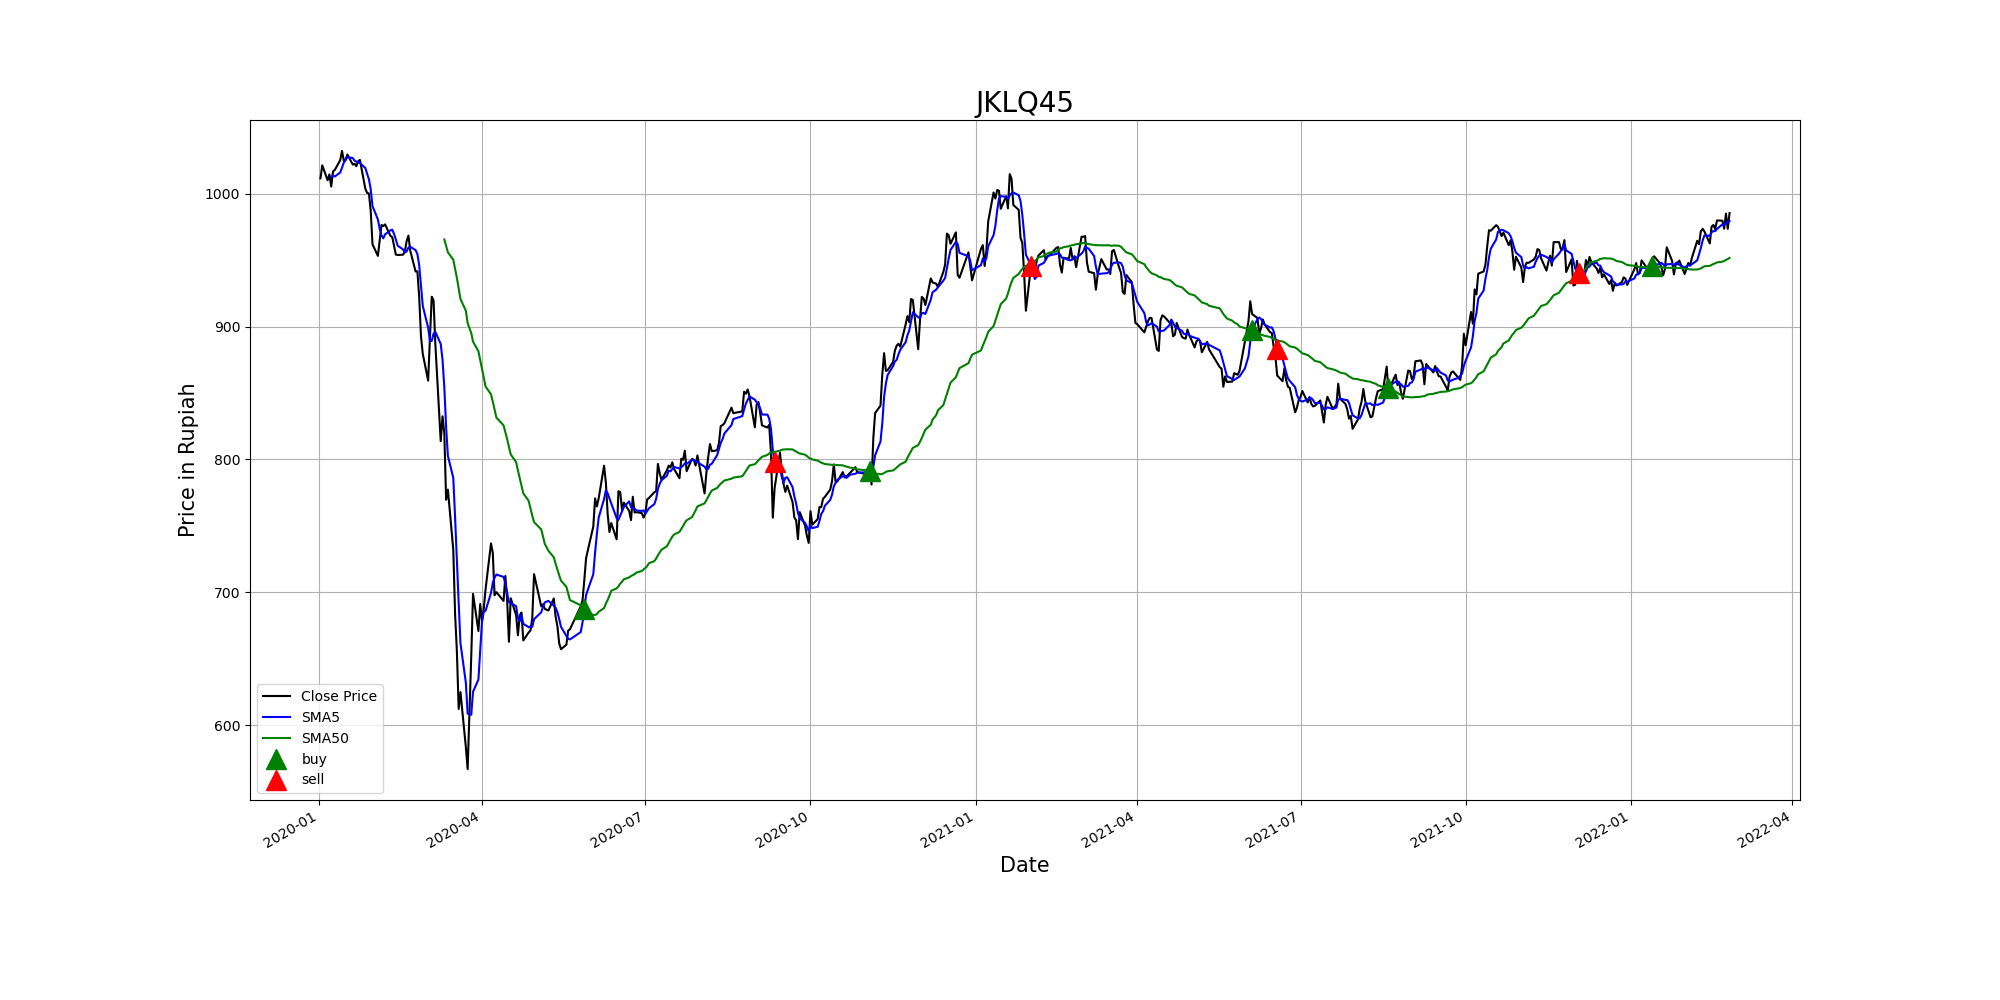

In [ ]:
plt.figure(figsize = (20,10))
data['Close'].plot(color = 'k', label = 'Close Price')
data['SMA5'].plot(color = 'b', label = 'SMA5')
data['SMA50'].plot(color = 'g', label = 'SMA50')

plt.plot(data[data['Position'] == 1].index, data['SMA5'][data['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(data[data['Position'] == -1].index, data['SMA5'][data['Position'] == -1], '^', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupiah', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('JKLQ45', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#calculating EMA 12 days
data['EMA12'] = data ['Close'].ewm(span=12, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA50,Signal,Position,EMA12
Date,,,,,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,976.994018,948.912202,1.0,0.0,969.924126
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,976.678015,949.414802,1.0,0.0,970.511182
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,978.392016,950.242202,1.0,0.0,972.752541
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,978.442016,950.908203,1.0,0.0,972.890615
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,979.558008,951.729203,1.0,0.0,974.836671


In [ ]:
#calculating EMA 50 days
data['EMA50'] = data ['Close'].ewm(span=50, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA50,Signal,Position,EMA12,EMA50
Date,,,,,,,,,,,,
2022-02-21,980.909973,984.979980,976.780029,979.780029,979.780029,1762100000,976.994018,948.912202,1.0,0.0,969.924126,953.213920
2022-02-22,974.099976,978.190002,965.919983,973.739990,973.739990,2053000000,976.678015,949.414802,1.0,0.0,970.511182,954.018864
2022-02-23,977.830017,985.080017,975.309998,985.080017,985.080017,2134600000,978.392016,950.242202,1.0,0.0,972.752541,955.236949
2022-02-24,981.890015,986.750000,962.729980,973.650024,973.650024,4096900000,978.442016,950.908203,1.0,0.0,972.890615,955.959030
2022-02-25,975.799988,988.299988,974.599976,985.539978,985.539978,3117900000,979.558008,951.729203,1.0,0.0,974.836671,957.119067


In [ ]:
data['Sinyal'] = 0.0
data['Sinyal'] = np.where(data['EMA12'] > data['EMA50'], 1.0, 0.0)
data['Posisi'] = data['Sinyal'].diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA50,Signal,Position,EMA12,EMA50,Sinyal,Posisi
Date,,,,,,,,,,,,,,
2020-01-02,1017.159973,1017.520020,1007.500000,1011.619995,1011.619995,612700000,NaN,NaN,0.0,NaN,1011.619995,1011.619995,0.0,NaN
2020-01-03,1016.719971,1021.489990,1012.969971,1021.489990,1021.489990,1083700000,NaN,NaN,0.0,0.0,1013.138456,1012.007054,1.0,1.0
2020-01-06,1012.929993,1016.159973,1005.830017,1010.229980,1010.229980,1118000000,NaN,NaN,0.0,0.0,1012.690998,1011.937364,1.0,0.0
2020-01-07,1013.780029,1016.530029,1008.489990,1014.640015,1014.640015,1186500000,NaN,NaN,0.0,0.0,1012.990847,1012.043351,1.0,0.0
2020-01-08,1007.099976,1010.440002,1004.099976,1005.450012,1005.450012,1373600000,1012.685998,NaN,0.0,0.0,1011.830718,1011.784788,1.0,0.0


<IPython.core.display.Javascript object>


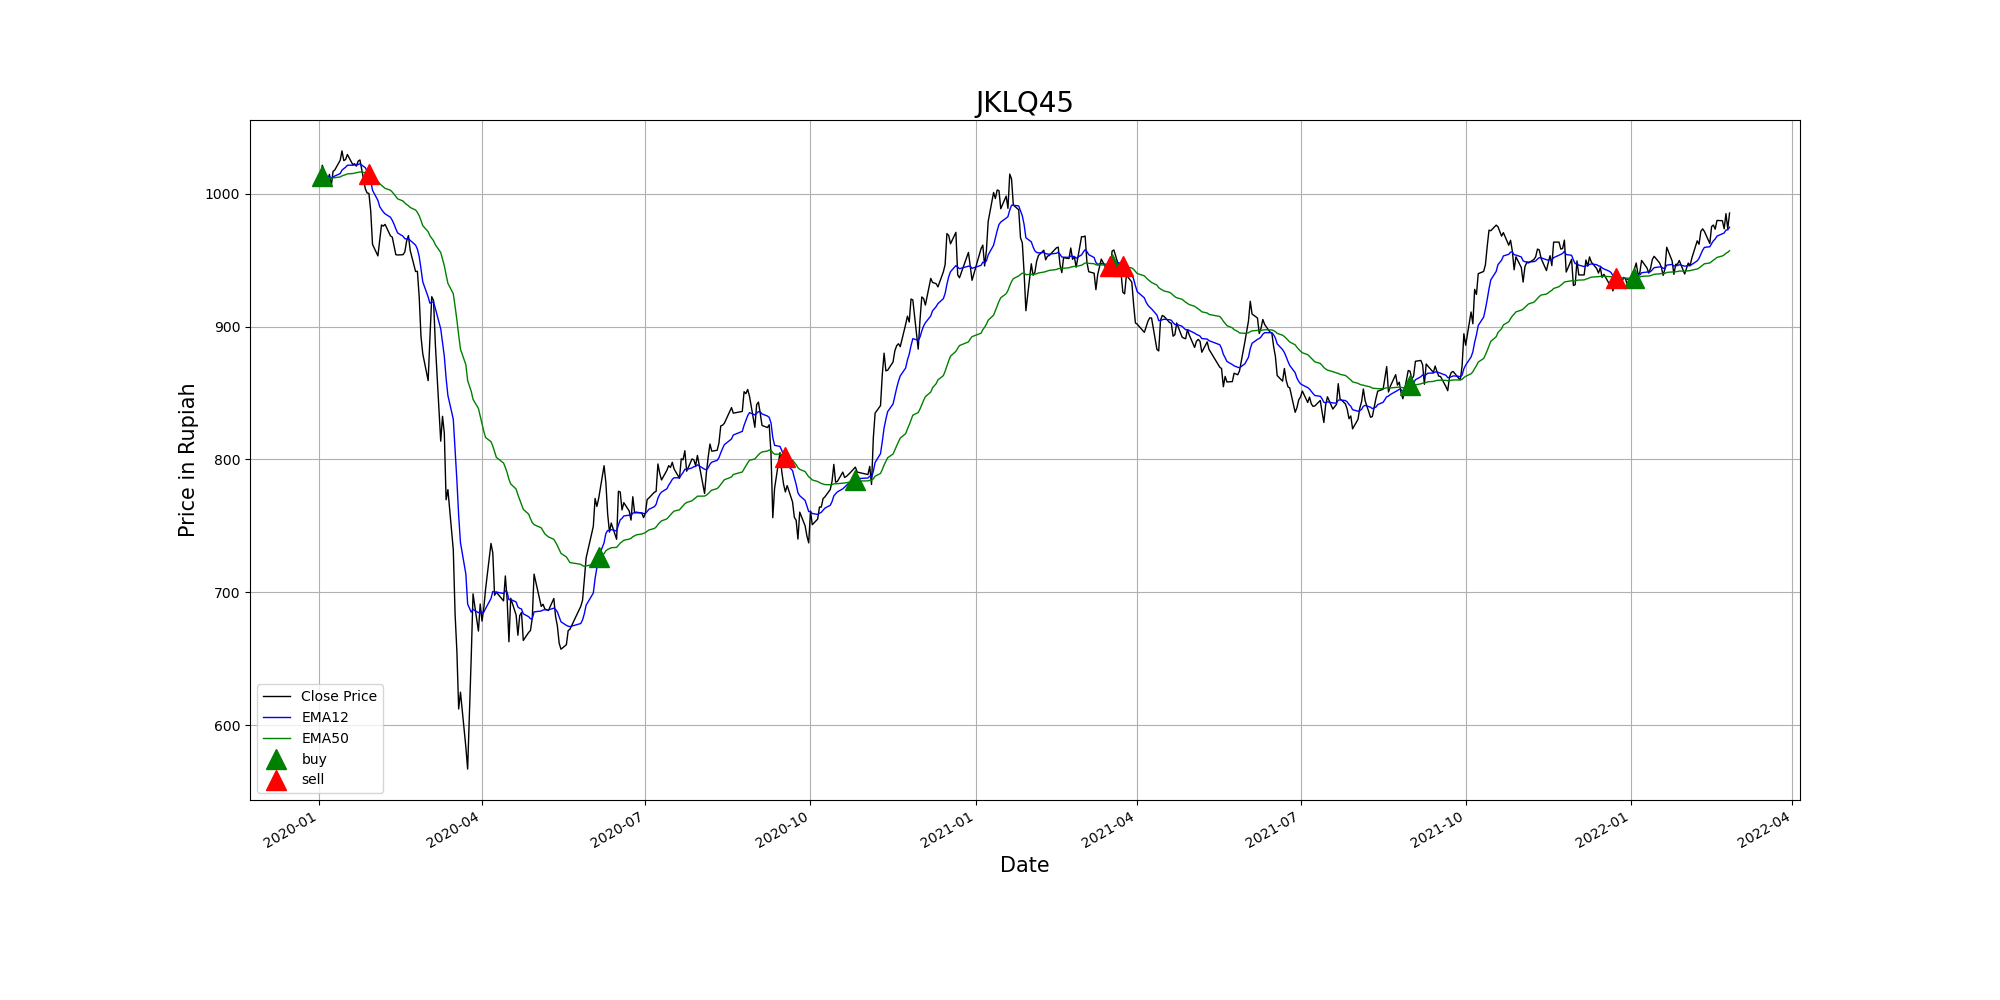

In [ ]:
plt.figure(figsize = (20,10))
data['Close'].plot(color = 'k', lw = 1, label = 'Close Price')
data['EMA12'].plot(color = 'b', lw = 1, label = 'EMA12')
data['EMA50'].plot(color = 'g', lw = 1, label = 'EMA50')

plt.plot(data[data['Posisi'] == 1].index, data['EMA12'][data['Posisi'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(data[data['Posisi'] == -1].index, data['EMA50'][data['Posisi'] == -1], '^', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupiah', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('JKLQ45', fontsize = 20)
plt.legend()
plt.grid()
plt.show()